# Statistical Significance

Slides [aquí](https://docs.google.com/presentation/d/10jV-CsgaaGv2F7H_gZnkz5_eVyVmqKLrc1rf26e2aDY/edit#slide=id.p1)

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import warnings
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from scipy import stats

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
# https://gist.github.com/AdamSpannbauer/c99c366b0c7d5b6c4920a46c32d738e5


def print_vif(x):
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)

    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print("VIF results\n-------------------------------")
    print(pd.Series(vifs, index=x.columns))
    print("-------------------------------\n")

<IPython.core.display.Javascript object>

## Warm Up! 🥵

### 🥵#1

* How do we evaluate scedasticity and why is it important to make sure this assumption is met in linear modeling?
  * What even is scedasticity? `variance of your residuals`
  * Do we want to have homoscedasticity or heteroscedasticity:
      * `homoscedasticity`
          * aka same variance of your residuals
          * aka no patterns seen in your mistakes
  * In the below cell... plot `X` with `y1` and `X` with `y2`.  Which one do you think is homoscedastic? heteroscedastic?
      * y1 - homoscedastic
      * y2 - heteroscedastic
  * What about something more formal than this eyeball test?

In [4]:
# set seed for reproducible random stuff
# Just generating some data to play with
np.random.seed(42)

n = 100
X = np.arange(n)
y1 = X + np.random.normal(0, 10, size=n)
y2 = X + np.random.normal(0, X ** 0.75)

<IPython.core.display.Javascript object>

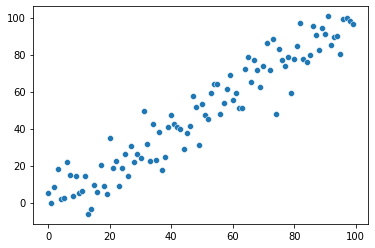

<IPython.core.display.Javascript object>

In [5]:
# Looks like residuals would be homoscedastic
sns.scatterplot(x=X, y=y1)
plt.show()

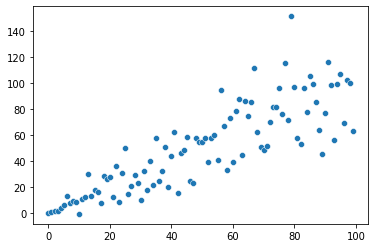

<IPython.core.display.Javascript object>

In [6]:
# Looks like residuals would be heteroscedastic
sns.scatterplot(x=X, y=y2)
plt.show()

In [7]:
X = X.reshape(-1, 1)

<IPython.core.display.Javascript object>

In [8]:
# What about something more formal than this eyeball test?

# NOTE: not best practice model building do a TRAIN/TEST SPLIT
# NOTE: not best practice model building do a TRAIN/TEST SPLIT
# NOTE: not best practice model building do a TRAIN/TEST SPLIT
# NOTE: not best practice model building do a TRAIN/TEST SPLIT
# NOTE: not best practice model building do a TRAIN/TEST SPLIT

# Fit a model for X to predict y1
model_1 = LinearRegression()
model_1.fit(X, y1)

LinearRegression()

<IPython.core.display.Javascript object>

In [9]:
# Fit a model for X to predict y2
model_2 = LinearRegression()
model_2.fit(X, y2)

LinearRegression()

<IPython.core.display.Javascript object>

In [10]:
# Residuals are what we call the mistakes
# residual_i = pred_i - actual_i
# -2 = 0 - 2

<IPython.core.display.Javascript object>

In [11]:
y1_residuals = model_1.predict(X) - y1
y2_residuals = model_2.predict(X) - y2

<IPython.core.display.Javascript object>

In [12]:
# Documenation: https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_breuschpagan.html

# Null hypothesis is homoscedastic
# Null hypothesis is homoscedastic
# Null hypothesis is homoscedastic
X_const = sm.add_constant(X)

_, p1, _, _ = sms.het_breuschpagan(y1_residuals, X_const)
_, p2, _, _ = sms.het_breuschpagan(y2_residuals, X_const)

print(p1)
print(p2)

0.6013945776291476
0.0009785352144070596


<IPython.core.display.Javascript object>

### 🥵 #2

* How do we evaluate for multicollinearity and why is this assumption important?
  * What even is multicollinearity? `redundant input features`
  * Do we want to have multicollinearity or no multicollinearity? `no multicollinearity`
  * In the below cell... Does `X` contain significant multicollinearity?
  * When creating dummies/one-hot-encoded variables, what do we need to do to avoid multicolinearararity?

In [13]:
# set seed for reproducible random stuff
np.random.seed(42)

n = 20
x1 = np.arange(n)
x2 = np.random.normal(size=n)
x3 = 2 * np.arange(n) + np.random.normal(0, 1, n)
X = pd.concat((pd.Series(x) for x in [x1, x2, x3]), axis=1)
X.columns = ["x1", "x2", "x3"]

<IPython.core.display.Javascript object>

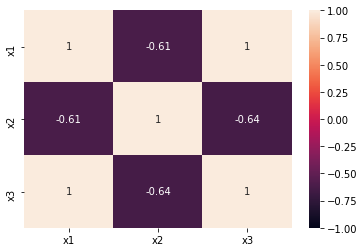

<IPython.core.display.Javascript object>

In [14]:
sns.heatmap(X.corr(), annot=True, vmin=-1)
plt.show()

In [15]:
print_vif(X)

VIF results
-------------------------------
const      5.074372
x1       169.655508
x2         1.869569
x3       177.519575
dtype: float64
-------------------------------



<IPython.core.display.Javascript object>

In [16]:
print_vif(X[["x1", "x2"]])

VIF results
-------------------------------
const    4.813182
x1       1.603729
x2       1.603729
dtype: float64
-------------------------------



<IPython.core.display.Javascript object>

## t-tests again!! 🎉

I can feel the excitement bubbling up in you all just writing this... I know, I missed them too.

Let's look more at this $t$ distribution to start.  We didn't really do that before.

* Generate a t distribution with `np.random.standard_t`.
    * Use a large-ish sample size
    * Play with the value of the degrees of freedom parameter (From the slide: "more degrees of freedom means closer to the normal distribution")
    

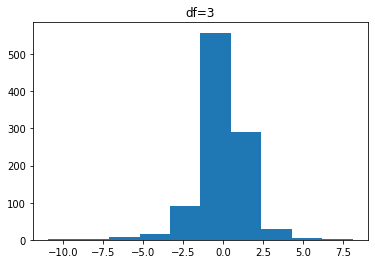

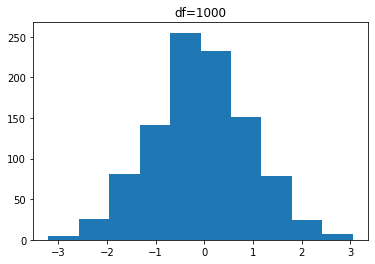

<IPython.core.display.Javascript object>

In [17]:
# set seed for reproducible random stuff
np.random.seed(42)

# Generate a t distribution with an np.random function and plot
n = 1000

x = np.random.standard_t(df=3, size=1000)
plt.hist(x)
plt.title("df=3")
plt.show()

x = np.random.standard_t(df=1000, size=1000)
plt.hist(x)
plt.title("df=1000")
plt.show()

* What's the null hypothesis in a t-test?
* When do we reject this null hypothesis?

Below are the average heights (in cm) by sex in USA according to [this big ole report](https://www.cdc.gov/nchs/data/series/sr_03/sr03_039.pdf) that I really found from [this wikipedia page](https://en.wikipedia.org/wiki/Average_human_height_by_country); the info also gives the sample size and standard deviation.

* Generate random normal samples using this information.
* Plot overlaid histograms of these samples you generated.

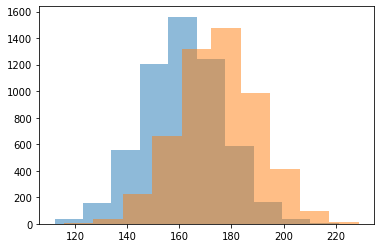

<IPython.core.display.Javascript object>

In [18]:
male_n = 5232
male_avg = 175.3
male_sd = 15.2

female_n = 5547
female_avg = 161.5
female_sd = 15.2

# Generate random normal samples using this information.
np.random.seed(42)
female_height = np.random.normal(female_avg, female_sd, female_n)
male_height = np.random.normal(male_avg, male_sd, male_n)

# Plot overlaid histograms of these samples you generated.
plt.hist(female_height, label="female", alpha=0.5)
plt.hist(male_height, label="male", alpha=0.5)
plt.show()

According to the histograms (and the average) men are taller.  Is this difference significant?

In [19]:
# Yes it is sig, p<0.05
stats.ttest_ind(female_height, male_height)

Ttest_indResult(statistic=-46.343565222289186, pvalue=0.0)

<IPython.core.display.Javascript object>

What if we had biased samples?? What is a biased sample??

Let's say we took a random sample of women and only ended up with WNBA players (not likely with a random sample, but the beauty of randomness is that it's possible, some things are just unlikely).  Below is the average height for WNBA players according to [reference.com](https://www.reference.com/world-view/average-height-wnba-player-a3cf4bccebffecfb); also is the number of WNBA players according to the [New York Times](https://www.nytimes.com/2018/05/05/sports/wnba-los-angeles-sparks.html).

Let's say our sample of men ended up with only marathon runners.  Below is the average height for top 100 male marathon runners according to [runnersworld.com](https://www.runnersworld.com/news/a20855134/great-marathoners-over-six-feet-tall-are-rare/).  

Use the same standard deviations from before and:
* generate some more normal distributions
* re-plot
* re-ttest

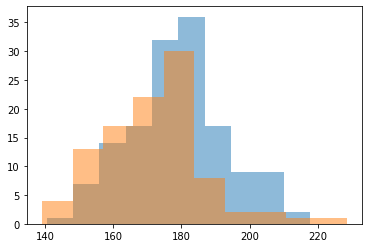

Ttest_indResult(statistic=3.8799436921424566, pvalue=0.00013473972567503448)

<IPython.core.display.Javascript object>

In [20]:
wnba_avg = 180.3
wnba_n = 144

marathon_avg = 169.92
marathon_n = 100

# generate some more normal distributions
# Generate random normal samples using this information.
np.random.seed(42)
female_height = np.random.normal(wnba_avg, female_sd, wnba_n)
male_height = np.random.normal(marathon_avg, male_sd, marathon_n)

# Plot overlaid histograms of these samples you generated.
plt.hist(female_height, label="female", alpha=0.5)
plt.hist(male_height, label="male", alpha=0.5)
plt.show()

stats.ttest_ind(female_height, male_height)

We conclude the opposite! Kinda forced us into this.. but! This is the whole idea about the p-value and the typical 5% cutoff.  The p-value is trying to help us differentiate from results that occur purely from chance related to sampling.  AKA every p-value is trying to protect against the chance that you're comparing WNBA players and marathoners when you want to be comparing women and men.  AKA a p-value is the probability that random chance generated differences that you're seeing in the data.

When we reject the null at the 5% level we're still saying there's a 5% chance these results happened due to sampling bias.  Typically 5% is pretty good in practice; here we forced the issue and got a reallllly unlikely sample to happen randomly.

## Regression and t-tests!

So why are we talking about t-tests?  I thought this was a linear regression class?

This is how we test if a predictor is 'significant'.  In a business context maybe we discover that our company's number of hours worked isn't a significant predictor of success; with that information we could argue that taking next Monday off isn't such a bad thing.

Enough about stats and business, lets get back to some snails.

* With the imported abalone dataset
  * Use `Whole_Weight` and `Diameter` as the predictors and `Rings` as the target.
  * Build a regression model using `statsmodels`
  * Print the model summary
* Use the output to identify if any of the predictors are significant.  Which ones are if any? `____________`

In [21]:
cols = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole_Weight",
    "Shucked_Weight",
    "Visecra_Weight",
    "Shell_Weight",
    "Rings",
]
abalone = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1GwCnxFT4Sd6iZDj07kNNhEREr7OJQnGvtxd67b5AMio/export?format=csv",
    names=cols,
)

<IPython.core.display.Javascript object>

In [22]:
# Use `Whole_Weight` and `Diameter` as the predictors
X = abalone[["Whole_Weight", "Diameter"]]

# `Rings` as the target
y = abalone["Rings"]

<IPython.core.display.Javascript object>

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [24]:
# Build a regression model using `statsmodels`
# Ordinary Least Squares (because we want the least squares of error)
#
# cost = (sum of squared errors)
# goal is to minimize cost
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     800.8
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          8.27e-285
Time:                        13:59:55   Log-Likelihood:                -7979.2
No. Observations:                3341   AIC:                         1.596e+04
Df Residuals:                    3338   BIC:                         1.598e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.8352      0.325      8.736      0.000       2.199       3.471
Whole_Weight     0.4210      0.247      1.708      0.088      -0.062       0.904
Diameter        16.5467      1.228     13.475      0.000      14.139      18.954
==============================================================================
Omnibus:                     1140.140   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3890.168
Skew:                           1.714   Prob(JB):                         0.00
Kurtosis:                       7.024   Cond. No.                         39.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

In [25]:
# Whole weight's p value is > 0.05;
# not a significant predictor of rings

# Diameter's p value is < 0.05;
# a significant predictor of rings

<IPython.core.display.Javascript object>

In [26]:
# intercept
# rings = 2.8 + 0.4*ww + 16.5*diam

# Here, we're not scaled so we interpret as below:
#       (assuming everything else held constant)
# if ww increases by 1; we expect rings to increase by 0.4
# if diam increases by 1; we expect rings to increase by 16.5


# Both for logistic and linear regression:
# If X is scaled then magnitude of coefficient
# represent feature importance

<IPython.core.display.Javascript object>

Note that `sklearn` agrees

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

weight_coef, diameter_coef = model.coef_
print(weight_coef, diameter_coef)

0.42103900524878063 16.546685812684895


<IPython.core.display.Javascript object>

We can recreate this output by 'bootstrapping' our data, fitting a model to each bootstrapped sample and seeing how the coefficients change.

In [28]:
np.random.seed(42)

data = abalone[["Whole_Weight", "Diameter", "Rings"]]

weight_coefs = []
diameter_coefs = []
for i in range(1000):
    sample = abalone.sample(frac=1.0, replace=True)
    X = sample[["Whole_Weight", "Diameter"]]
    y = sample["Rings"]

    model = LinearRegression()
    model.fit(X, y)

    weight_coef, diameter_coef = model.coef_

    weight_coefs.append(weight_coef)
    diameter_coefs.append(diameter_coef)

<IPython.core.display.Javascript object>

In [29]:
weight_ci_lo = np.percentile(weight_coefs, 2.5)
weight_ci_hi = np.percentile(weight_coefs, 97.5)

print("Weight Coefficient CI")
weight_ci_lo, weight_ci_hi

Weight Coefficient CI


(-0.03816510555693532, 0.8350225252385813)

<IPython.core.display.Javascript object>

In [30]:
diameter_ci_lo = np.percentile(diameter_coefs, 2.5)
diameter_ci_hi = np.percentile(diameter_coefs, 97.5)

print("Diameter Coefficient CI")
diameter_ci_lo, diameter_ci_hi

Diameter Coefficient CI


(15.016223583464566, 18.754935593803552)

<IPython.core.display.Javascript object>

* Plot histograms for the coefficient sampling distributions
* Add lines for the ci bounds

In [31]:
# TODO: adam make plots

<IPython.core.display.Javascript object>

Improve model

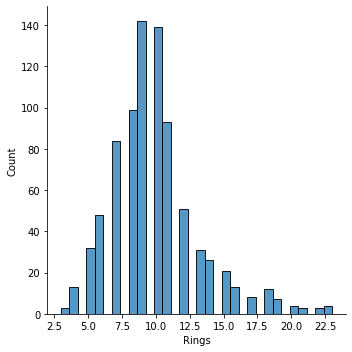

<IPython.core.display.Javascript object>

In [32]:
sns.displot(y_test)
plt.show()

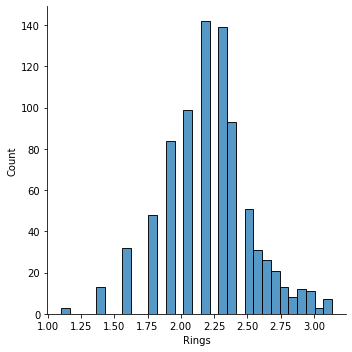

<IPython.core.display.Javascript object>

In [33]:
sns.displot(np.log(y_test))
plt.show()

In [34]:
y_train = np.log(y_train)
y_test = np.log(y_test)

<IPython.core.display.Javascript object>

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [36]:
model.score(X_train, y_train)

0.4409813302270815

<IPython.core.display.Javascript object>

In [37]:
model.score(X_test, y_test)

0.48501801745060547

<IPython.core.display.Javascript object>

In [38]:
y_pred = model.predict(X_test)

<IPython.core.display.Javascript object>

In [39]:
# log(rings) = 1.27 + -0.1*ww + 2.6*diam

<IPython.core.display.Javascript object>

In [40]:
# Unlog the predictions:
y_test = np.exp(y_test)
y_pred = np.exp(y_pred)

pred_df = abalone.loc[X_test.index, :]
pred_df["y_true"] = y_test
pred_df["y_pred"] = y_pred
pred_df["resid"] = pred_df["y_pred"] - pred_df["y_true"]
pred_df["abs_resid"] = pred_df["resid"].abs()
pred_df = pred_df.sort_values("abs_resid", ascending=False)
pred_df.head()

Sex  Length  Diameter  Height  Whole_Weight  Shucked_Weight  \
811    F   0.490     0.365   0.130        0.6835          0.1650   
433    M   0.545     0.420   0.140        0.7505          0.2475   
314    M   0.630     0.485   0.175        1.3000          0.4335   
2335   M   0.610     0.490   0.150        1.1030          0.4250   
351    F   0.585     0.450   0.170        0.8685          0.3325   

      Visecra_Weight  Shell_Weight  Rings  y_true     y_pred      resid  \
811           0.1315         0.205     21    21.0   8.577403 -12.422597   
433           0.1300         0.255     22    22.0   9.828973 -12.171027   
314           0.2945         0.460     23    23.0  11.007376 -11.992624   
2335          0.2025         0.360     23    23.0  11.376627 -11.623373   
351           0.1635         0.270     22    22.0  10.499836 -11.500164   

      abs_resid  
811   12.422597  
433   12.171027  
314   11.992624  
2335  11.623373  
351   11.500164

<IPython.core.display.Javascript object>

In [41]:
fig = px.scatter(
    data_frame=pred_df, x="y_true", y="y_pred", color="Sex", hover_data=pred_df.columns
)
fig.add_shape(
    type="line", x0=y_test.min(), y0=y_test.min(), x1=y_test.max(), y1=y_test.max()
)

<IPython.core.display.Javascript object>

-----
## Afternoon

Let's start model Rings from scratch.  We won't restrict ourselves on the features we can use.  Everything is fair game. Readyyyy.. go

In [42]:
cols = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole_Weight",
    "Shucked_Weight",
    "Visecra_Weight",
    "Shell_Weight",
    "Rings",
]

abalone = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1GwCnxFT4Sd6iZDj07kNNhEREr7OJQnGvtxd67b5AMio/export?format=csv",
    names=cols,
)

<IPython.core.display.Javascript object>

In [43]:
abalone.shape

(4177, 9)

<IPython.core.display.Javascript object>

In [44]:
abalone.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_Weight      0
Shucked_Weight    0
Visecra_Weight    0
Shell_Weight      0
Rings             0
dtype: int64

<IPython.core.display.Javascript object>

In [45]:
abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_Weight      float64
Shucked_Weight    float64
Visecra_Weight    float64
Shell_Weight      float64
Rings               int64
dtype: object

<IPython.core.display.Javascript object>

In [46]:
abalone.head()

Sex  Length  Diameter  Height  Whole_Weight  Shucked_Weight  Visecra_Weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_Weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

<IPython.core.display.Javascript object>

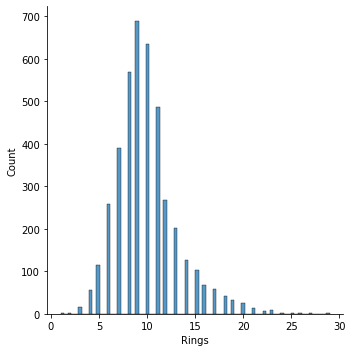

<IPython.core.display.Javascript object>

In [47]:
# we want to predict rings, we should look at it
# Some hints of skew, perhaps we look into a log transform
# TODO: come back and investigate a log if accuracy no good
sns.displot(abalone["Rings"])
plt.show()

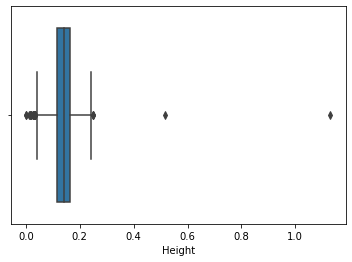

<IPython.core.display.Javascript object>

In [48]:
sns.boxplot(x=abalone["Height"])
plt.show()

Rings Sex variable  value
0     15   M   Length  0.455
1      7   M   Length  0.350

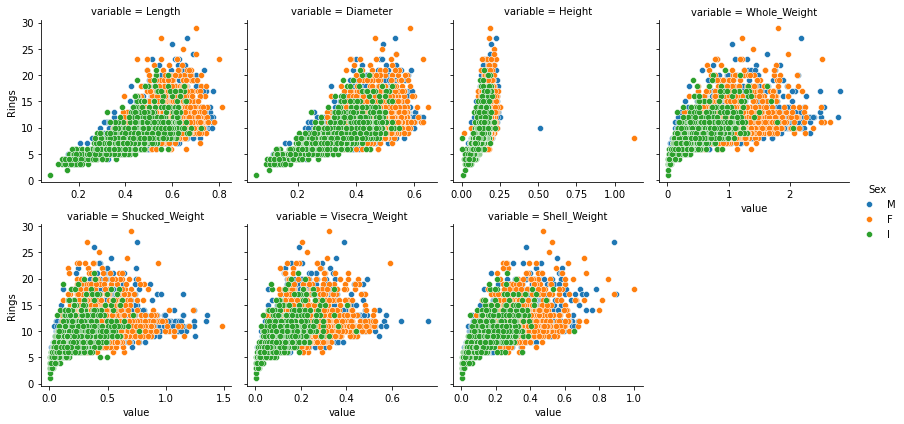

<IPython.core.display.Javascript object>

In [49]:
tall_df = abalone.melt(id_vars=["Rings", "Sex"])
display(tall_df.head(2))

fg = sns.FacetGrid(tall_df, col="variable", hue="Sex", col_wrap=4, sharex=False)
fg.map(sns.scatterplot, "value", "Rings")
fg.add_legend()
plt.show()

In [50]:
# Investigate dropping high leverage points from height
abalone = abalone[abalone["Height"] < 0.4]

<IPython.core.display.Javascript object>

Rings Sex variable  value
0     15   M   Length  0.455
1      7   M   Length  0.350

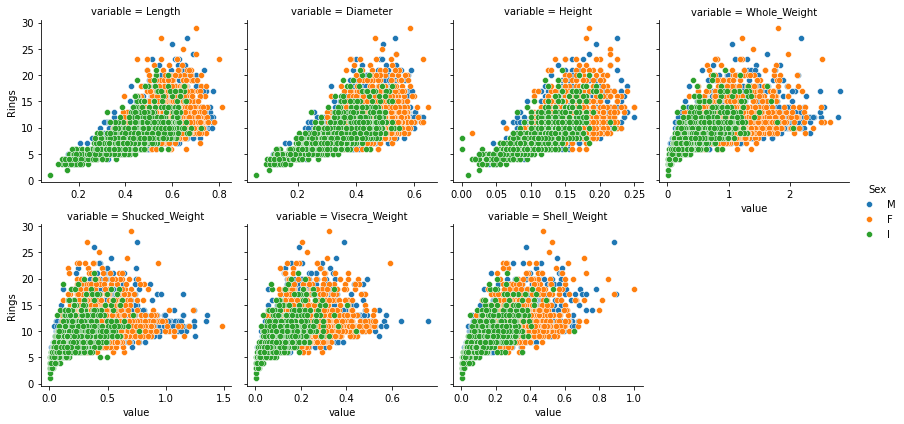

<IPython.core.display.Javascript object>

In [51]:
tall_df = abalone.melt(id_vars=["Rings", "Sex"])
display(tall_df.head(2))

fg = sns.FacetGrid(tall_df, col="variable", hue="Sex", col_wrap=4, sharex=False)
fg.map(sns.scatterplot, "value", "Rings")
fg.add_legend()
plt.show()

Rings Sex variable  value
0  2.70805   M   Length  0.455
1  1.94591   M   Length  0.350

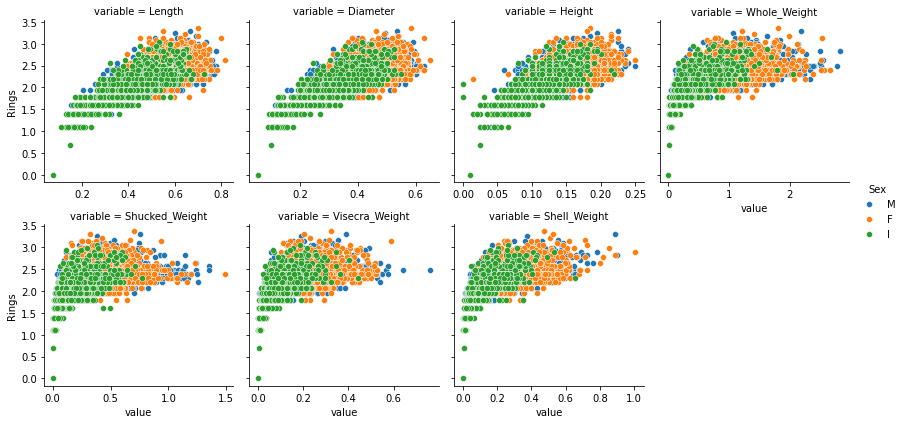

<IPython.core.display.Javascript object>

In [52]:
# Investigate log(y) transform
tall_df = abalone.melt(id_vars=["Rings", "Sex"])
tall_df["Rings"] = np.log(tall_df["Rings"])
display(tall_df.head(2))

fg = sns.FacetGrid(tall_df, col="variable", hue="Sex", col_wrap=4, sharex=False)
fg.map(sns.scatterplot, "value", "Rings")
fg.add_legend()
plt.show()

Rings Sex variable  value
0  2.70805   M   Length  0.455
1  1.94591   M   Length  0.350

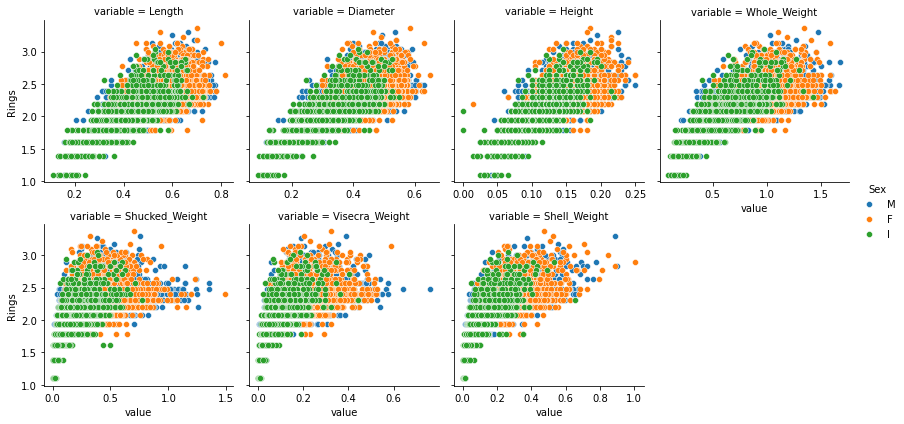

<IPython.core.display.Javascript object>

In [53]:
# Investigate sqrt transform of whole weight
# plot shows log(y) by sqrt(x)
df_copy = abalone.copy()
df_copy["Whole_Weight"] = np.sqrt(df_copy["Whole_Weight"])

tall_df = df_copy.melt(id_vars=["Rings", "Sex"])
tall_df = tall_df[tall_df["Rings"] >= 3]
tall_df["Rings"] = np.log(tall_df["Rings"])
display(tall_df.head(2))

fg = sns.FacetGrid(tall_df, col="variable", hue="Sex", col_wrap=4, sharex=False)
fg.map(sns.scatterplot, "value", "Rings")
fg.add_legend()
plt.show()

In [54]:
# It looks like the transforms might help to build
# a more accurater model, but this comes at the cost
# of interpretability.

<IPython.core.display.Javascript object>

In [55]:
X = abalone.drop(columns="Rings")
y = abalone["Rings"]

<IPython.core.display.Javascript object>

In [56]:
X = pd.get_dummies(X)
# Drop out intersex because of guestimated bilogical reasons
X = X.drop(columns="Sex_I")

<IPython.core.display.Javascript object>

In [57]:
X = X.drop(
    columns=["Whole_Weight", "Diameter", "Visecra_Weight", "Length", "Shell_Weight"],
    errors="ignore",
)

<IPython.core.display.Javascript object>

In [58]:
print_vif(X)

VIF results
-------------------------------
const             20.937453
Height             3.595801
Shucked_Weight     3.386655
Sex_F              1.883917
Sex_M              1.813058
dtype: float64
-------------------------------



<IPython.core.display.Javascript object>

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [60]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     584.0
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:00:15   Log-Likelihood:                -7752.5
No. Observations:                3340   AIC:                         1.552e+04
Df Residuals:                    3335   BIC:                         1.555e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.7045      0.195      8.

<IPython.core.display.Javascript object>

In [61]:
# Rsquared: 41.2% (we predict this much better than guessing y_train.mean())

<IPython.core.display.Javascript object>

In [62]:
# rings = 1.7 + (65*height) + (-4.5*sw) + (1.1*sex_f) + (0.9*sex_m)

<IPython.core.display.Javascript object>

------

Let's rebuild our model and use an *interaction term* (\**gasp*\*).  Let's go back to using only `'Whole_Weight'` and `'Diameter'`.  After creating the `X` and `y`:

* Create a new feature that captures the interaction between our current 2 predictors
  * Multiply the 2 features together and assign this to a new column
* Rebuild the model using the 3 features
* Re-print the summary
* Interpret the t-tests for these coefficients

In [63]:
# Define X (['Whole_Weight', 'Diameter']) and y ('Rings')
cols = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole_Weight",
    "Shucked_Weight",
    "Visecra_Weight",
    "Shell_Weight",
    "Rings",
]

abalone = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1GwCnxFT4Sd6iZDj07kNNhEREr7OJQnGvtxd67b5AMio/export?format=csv",
    names=cols,
)

X = abalone[["Whole_Weight", "Diameter"]].copy()
y = abalone["Rings"]

<IPython.core.display.Javascript object>

In [64]:
# y = 12 + 3*ww + 4*d + 1*ww*d

<IPython.core.display.Javascript object>

In [65]:
# Create a new feature that captures the interaction between our current 2 predictors
X["ww_d_interaction"] = X["Whole_Weight"] * X["Diameter"]
# X["ww*ww"] = X["Whole_Weight"] * X["Whole_Weight"]

# Build a regression model using `statsmodels`
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     729.7
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:00:17   Log-Likelihood:                -9935.6
No. Observations:                4177   AIC:                         1.988e+04
Df Residuals:                    4173   BIC:                         1.990e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.6674      0.283      9.423      0.000       2.112       3.222
Whole_Weight         7.3842      0.790      9.352      0.000       5.836       8.932
Diameter            13.0543      1.152     11.329      0.000      10.795      15.313
ww_d_interaction   -10.9069      1.184     -9.211      0.000     -13.228      -8.585
==============================================================================
Omnibus:                     1371.274   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4486.551
Skew:                           1.667   Prob(JB):                         0.00
Kurtosis:                       6.830   Cond. No.                         57.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

Wait, what did we just do?

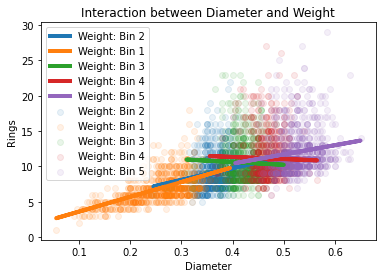

<IPython.core.display.Javascript object>

In [66]:
# No need to worry about this code for needs today.
# Of course, give it a look if you're curious.

# its easier to see if we bin we'll bin weight and then a model
# for diameter when within each bin of weight
def bin_array(x, n_bins=5):
    percentiles = np.linspace(0, 100, n_bins + 1)[:-1]
    bins = np.percentile(x, percentiles)
    binned = np.digitize(x, bins)
    return binned


abalone["binned_weight"] = bin_array(abalone["Whole_Weight"])
bins = abalone["binned_weight"].unique()
for b in bins:
    subset = abalone[abalone["binned_weight"] == b]

    # if we have only 1 row we wont fit a model
    if subset.shape[0] <= 1:
        continue

    X = subset["Diameter"]
    y = subset["Rings"]

    X_const = sm.add_constant(X)
    y_pred = sm.OLS(y, X_const).fit().predict()

    lab = f"Weight: Bin {b}"
    plt.plot(X, y_pred, label=lab, lw=4)
    ## (un)comment below to toggle plotting on same axes
    plt.scatter(X, y, label=lab, alpha=0.1)
#     plt.show()


plt.xlabel("Diameter")
plt.ylabel("Rings")
plt.title("Interaction between Diameter and Weight")
plt.legend()
plt.show()

So what do we see here? How Diameter affects Rings depends on how heavy our snail is. When our snail is lighter a higher diameter means more Rings.  When we go up in weight we start to see this trend taper off, at a certain weight diameter starts to matter less for predicting rings. In other words the effects of diameter and weight interact with each other.